# Tratamento de Dados de Telescópio
**Equipe:** Daniel, Jones, Kleberson, Murilo

## Apresentação
### O Telescópio Kepler e a Descoberta de Exoplanetas

<p align = "center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/NASA-KeplerSpaceTelescope-ArtistConcept-20141027.jpg/500px-NASA-KeplerSpaceTelescope-ArtistConcept-20141027.jpg", width="500">
<p>

#### Introdução
- O Telescópio Espacial Kepler, lançado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
  ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
- A missão Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
planetários, contribuindo significativamente para a nossa compreensão do universo.

#### Objetivos da Missão Kepler
- **Exploração da Diversidade Planetária**: Investigar a variedade de planetas e suas características.
- **Identificação de Exoplanetas**: Detectar planetas em zonas habitáveis, onde a vida poderia existir.
- **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras missões da NASA e pesquisas científicas.

#### O Conjunto de Dados
- O conjunto de dados contém informações sobre aproximadamente **3.373 exoplanetas confirmados**.
- Inclui dados coletados durante as missões Kepler e K2, abrangendo vários anos de observação.
- **Informações Disponíveis**:
  - Nome da estrela hospedeira
  - Características dos planetas (tamanho, massa, composição)
  - Parâmetros orbitais (período orbital, distância da estrela)
  - Métodos de descoberta (transito, velocidade radial)
  - Propriedades estelares (tipo de estrela, temperatura)

#### Importância dos Dados
- Os dados do Kepler são cruciais para entender a formação e evolução dos sistemas planetários.
- Permitem a análise estatística da distribuição de exoplanetas em diferentes tipos de estrelas e suas <br>características.
- A pesquisa com esses dados pode revelar padrões que ajudam a identificar quais sistemas planetários <br> têm maior probabilidade de abrigar vida.



## Tratamento de Dados
**Bibliotecas Necessárias**

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro, binom
from scipy import stats

**Filtragem dos Dados**

In [2]:
# 1) Lê o CSV para um DataFrame
df_original = pd.read_csv('../data/planets.csv')

# Constantes
AU_m = 1.496e+11
AU_rj = 69911 / 1.496e+8
AU_rs = 696340 / 1.496e+8

# 2) Máscara para filtrar os dados mantendo só as linhas onde 'col_importante' NÃO é NaN
mask = (
    (df_original['pl_hostname'] != '') &
    (df_original['pl_pnum'] != '') &
    (df_original['pl_orbper'].notna()) &
    (df_original['pl_orbsmax'].notna()) &
    (df_original['pl_orbeccen'].notna()) &
    (df_original['pl_orbincl'].notna()) &
    (df_original['pl_bmassj'] != '') &
    (df_original['pl_radj'].notna()) &
    (df_original['pl_dens'].notna()) &
    (df_original['st_dist'].notna()) &
    (df_original['st_teff'].notna()) &
    (df_original['st_mass'].notna()) &
    (df_original['st_rad'].notna())
)

df = df_original[mask]

# 3) A partir daqui use df para suas análises
print(f"Quantidade de dados que serão utilizados nos testes: {len(df)}")

Quantidade de dados que serão utilizados nos testes: 225


## Utilizando os Dados

### 🌍 Importância de Conhecer o Raio de um Planeta

O raio de um planeta é uma das propriedades físicas mais fundamentais, e sua medição tem várias implicações importantes:


- Estimar o Tamanho e Volume:
O raio permite calcular o **volume** do planeta por meio da fórmula:

$$
V = \frac{4}{3} \pi r^3
$$

Com o volume e a massa, podemos determinar a **densidade média**, o que fornece pistas sobre a composição do planeta (rochoso, gasoso, etc.).


- Identificar a Natureza do Planeta
Planetas com raio pequeno (~0,5 a 1,5 raios terrestres) tendem a ser **rochosos**.
Planetas com raio maior geralmente são **gasosos** ou do tipo "mini-Netuno".



- Importante para a Detecção via Trânsito
No método de trânsito, o raio determina o **quanto de luz a estrela perde** quando o planeta passa em frente a ela:

$$
\text{Profundidade do trânsito} \propto \left(\frac{R_{\text{planeta}}}{R_{\text{estrela}}}\right)^2
$$

Ou seja, planetas maiores são mais fáceis de detectar por esse método.

- Relacionado à Gravidade Superficial
Com o raio e a massa, é possível calcular a **gravidade na superfície**:

$$
g = \frac{G \cdot M}{R^2}
$$

Essa gravidade influencia a capacidade do planeta de **reter uma atmosfera** e a possibilidade de pouso de sondas ou presença de vida.

- Influência na Habitabilidade
Planetas muito pequenos podem **não reter atmosfera**.
Planetas muito grandes podem ter atmosferas espessas e inóspitas.
O tamanho afeta também a **atividade geológica**, essencial para o equilíbrio climático.

- Resumindo
O raio afeta **densidade, gravidade, detecção via trânsito, composição e habitabilidade**. É um dos primeiros critérios usados para avaliar a semelhança com a Terra e o potencial para abrigar vida.




Como o raio de cada planeta está medido em **raios de júpiter**, faremos uma conversão do raio da Terra:

$R_{Terra} = 6378,1~km = \frac{6378,1}{69911} \approx 0,09123$ raios de júpiter

In [3]:
# Parâmetros
coluna = "pl_radj"
x      = 0.09123     # valor alvo (float)
tol    = 0.1        # tolerância, ex.: ±0.1

mask_r = (df_filtrado[coluna] - x).abs() <= tol
df_r = df_filtrado[mask_r]

# Média
media = df_r[coluna].mean()

# Variância amostral
variancia_amostral = df_r[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_r[coluna].std(ddof=1)

print(f"Cerca de {len(df_r[coluna])} planetas possuem o raio semelhante ao da Terra!")
# Mostra quantos, dos planetas encontrados, possuem raio semelhante ao da Terra
print(f"Proporção dos planetas encontrados: {len(df_r)/len(df_filtrado) :.7f}")
print(f"Média do raio dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")

# --- plotando histograma ---
plt.figure(figsize=(8, 5))

df_r[coluna].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Raios")
plt.xlabel("Raio")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

# df_fitrado: dados na tabela que possuem um valor de raio
menores = (df_filtrado[coluna] < x).mean() * 100
maiores = (df_filtrado[coluna] > x).mean() * 100
print(f"Proporção (planetas menores que a Terra): {menores:.2f}%")
print(f"Proporção (planetas maiores que a Terra): {maiores:.2f}%\n")
print(f"Proporção com raio médio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

NameError: name 'df_filtrado' is not defined

Calculando IC de 95% para a média dos raio:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,13335$

$IC: 0,13335 \pm z_{0,025} \cdot \sqrt{\frac{0,13335 \cdot (1-0,13335)}{380}} $

In [ ]:
# Média dos raios semelhantes à terra / Média dos raios de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [0.0896, 0.1664]


Estamos 95% confiantes de que a proporção populacional verdadeira está no intervalo $[0,0992;~0,1675]$.


### ⚖️ Massa de um Exoplaneta

A massa de um exoplaneta é uma das grandezas mais importantes para entender sua **composição, estrutura, gravidade** e até seu potencial de **habitabilidade**. Veja os principais motivos:

---

#### 🔹 1. Determinação da Densidade

Com a **massa (M)** e o **raio (R)** do planeta, é possível calcular sua **densidade média**:

$$
\rho = \frac{M}{\frac{4}{3} \pi R^3}
$$

Essa densidade nos ajuda a inferir a **composição interna** do planeta:
- Densidade alta → planeta rochoso (tipo Terra)
- Densidade baixa → planeta gasoso (tipo Júpiter)

---

#### 🔹 2. Cálculo da Gravidade Superficial

A massa também é essencial para calcular a **gravidade na superfície** do planeta:

$$
g = \frac{G \cdot M}{R^2}
$$

A gravidade afeta:
- Capacidade de reter atmosfera
- Condições para pouso de sondas
- Conforto para vida (gravidade muito forte ou fraca pode ser um problema)

---

#### 🔹 3. Estimativa de Atmosfera

Planetas com **massa muito baixa** podem não ter força gravitacional suficiente para manter uma atmosfera estável.  
Já os muito massivos podem ter atmosferas densas e hostis, como Netuno ou Júpiter.

---

#### 🔹 4. Classificação do Planeta

A massa é usada para **classificar o tipo do exoplaneta**:
- **Menos de 2 massas terrestres** → geralmente rochosos
- **De 2 a 10 massas terrestres** → super-Terras ou mini-Netunos
- **Acima de 10 massas terrestres** → gasosos ou gigantes

---

#### ✅ Resumo

Conhecer a massa de um exoplaneta é crucial para entender sua **composição, atmosfera, gravidade e habitabilidade**. Junto ao raio, ela permite uma caracterização muito mais precisa do planeta.



Como o massa de cada planeta também está medido em **raios de júpiter**, faremos uma conversão da massa da Terra:

$M_{Terra} = 5,9722 \cdot 10^{24}~kg = \frac{5,9722 \cdot 10^{24}}{1,898 \cdot 10^{27}} \approx 0,003147$ massas de júpiter

In [ ]:
# Parâmetros
coluna = "pl_bmassj"
x      = 0.003147     # valor alvo (float)
tol    = 0.01       # tolerância, ex.: ±0.01

mask_m = (df_filtrado[coluna] - x).abs() <= tol
df_m = df_filtrado[mask_m]

# Média
media = df_m[coluna].mean()

# Variância amostral
variancia_amostral = df_m[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_m[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_m[coluna])} planetas possuem massa semelhante a da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_m)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média da massa dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")
 
serie = df_m[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Massas")
plt.xlabel("Massa")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_m[coluna] < x).mean() * 100
print(f"Proporção (planetas menos massivo que a Terra): {menores:.2f}%")
print(f"Proporção (planetas mais massivo que a Terra): {100 - menores:.2f}%")
print(f"Proporção com raio médio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a média das massa:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,00605$

$IC: 0,00605 \pm z_{0,025} \cdot \sqrt{\frac{0,00605 \cdot (1-0,00605)}{380}} $

In [ ]:
# Média das massa semelhantes à terra / Média das massa de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

Com isso, concluímos que a proporção da massa populacional dos planetas semelhantes a Terra está no intervalo $[-0,0017;~0,0139]$.


### Excentricidade Orbital de um Exoplaneta

A **excentricidade orbital** (geralmente representada por **e**) descreve o **formato da órbita** de um planeta ao redor de sua estrela. Ela é essencial para entender o **clima, estabilidade orbital e potencial de habitabilidade** do planeta.

---

#### 🔹 1. Forma da Órbita

A excentricidade é um número entre 0 e 1:
- **e = 0** → órbita perfeitamente **circular**
- **0 < e < 1** → órbita **elíptica**
- **e = 1** → trajetória parabólica (não está em órbita)

---

#### 🔹 2. Variação na Distância até a Estrela

Em órbitas elípticas, a distância entre o planeta e a estrela muda ao longo do tempo.  
Isso afeta diretamente a **quantidade de radiação recebida**, e, portanto, a **temperatura** do planeta.

A distância mínima (periastro) e máxima (apoastro) podem ser calculadas por:

- **Periastro**:  
  $$
  r_{\text{min}} = a(1 - e)
  $$

- **Apoastro**:  
  $$
  r_{\text{max}} = a(1 + e)
  $$

Onde \( a \) é o **semi-eixo maior** da órbita.

---

#### 🔹 3. Impacto no Clima e Habitabilidade

Órbitas muito excêntricas podem gerar **variações climáticas extremas**, dificultando a estabilidade das condições para a vida.

- Excentricidade baixa → clima mais **estável**
- Excentricidade alta → clima com **grandes oscilações sazonais**

---

#### 🔹 4. Pistas sobre Formação Planetária

A distribuição das excentricidades nos ajuda a entender:
- A **história de formação e migração** dos planetas
- **Interações gravitacionais** com outros planetas ou estrelas próximas
- Possíveis **colisões ou perturbações** passadas

---

### ✅ Resumo

A excentricidade orbital afeta a **distância até a estrela**, a **variação de temperatura**, a **possibilidade de vida estável** e fornece pistas sobre a **formação do sistema planetário**.

$e_{Terra} \approx 0,0167$ 

In [ ]:
# Parâmetros
coluna = "pl_orbeccen"
x      = 0.0167     # valor alvo (float)
tol    = 0.01       # tolerância, ex.: ±0.01

mask_e = (df_filtrado[coluna] - x).abs() <= tol
df_e = df_filtrado[mask_e]

# Média
media = df_e[coluna].mean()

# Variância amostral
variancia_amostral = df_e[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_e[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_e[coluna])} planetas possuem excentridade orbital semelhante a da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_e)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média da excentridade dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")
 
serie = df_e[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Excentridades")
plt.xlabel("Excentridade Orbital")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_r[coluna] < x).mean() * 100
print(f"Proporção (planetas com excentridade menor que a Terra): {menores:.2f}%")
print(f"Proporção (planetas com excentridade maior que a Terra): {100 - menores:.2f}%")
print(f"Proporção com excentridade média de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")


Calculando IC de 95% para a média das Excentricidades:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,19751$

$IC: 0,19751 \pm z_{0,025} \cdot \sqrt{\frac{0,19751 \cdot (1-0,19751)}{380}} $


In [ ]:
################# IC de Excentridade #################

# Média das excentridades semelhantes à terra / Média das excentricidades orbitais de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

Com isso, concluímos que a proporção da excentridade populacional dos planetas semelhantes a Terra está no intervalo $[0,1518;~0,2433]$.


### 🕒 Importância do Período Orbital de um Exoplaneta

O **período orbital** é o tempo que um planeta leva para completar uma volta ao redor de sua estrela. Esse dado é fundamental para entender a **dinâmica orbital**, a **posição do planeta na zona habitável** e até para a **detecção do exoplaneta**.

---

#### 🔹 1. Relação com a Distância da Estrela (Lei de Kepler)

Através da **Terceira Lei de Kepler**, é possível relacionar o período orbital (**P**) com o **semi-eixo maior da órbita (a)**:

$$
P^2 = \frac{4\pi^2 a^3}{G(M + m)}
$$

Para planetas com massa muito menor que a da estrela, simplifica-se para:

$$
P^2 \propto a^3
$$

Essa relação mostra que planetas mais distantes da estrela têm **períodos mais longos**.

---

#### 🔹 2. Indicação de Temperatura Média

Quanto **maior o período orbital**, **mais distante o planeta está da estrela**, o que geralmente indica **temperaturas mais baixas**.

- Períodos curtos → órbitas próximas → planetas mais quentes
- Períodos longos → órbitas distantes → planetas mais frios

Isso é importante para avaliar se o planeta está na **zona habitável** — a região onde a temperatura permite a existência de água líquida.

---

#### 🔹 3. Detecção por Trânsito ou Velocidade Radial

O período orbital é uma **medida-chave** nos métodos de detecção:

- No método do **trânsito**, o período é o tempo entre duas quedas sucessivas de brilho.
- No método da **velocidade radial**, é o tempo entre oscilações no espectro da estrela.

Quanto menor o período, **mais fácil detectar** o planeta (mais trânsitos visíveis em menos tempo).

---

#### 🔹 4. Estabilidade Orbital

O período também ajuda a entender **resonâncias orbitais** com outros planetas e a **estabilidade de longo prazo** do sistema. Sistemas com períodos ajustados podem indicar **interações gravitacionais importantes**.

---

### ✅ Resumo

O período orbital indica **a distância do planeta à estrela**, influencia a **temperatura**, a **detecção do planeta** e até a **estabilidade do sistema planetário**. É um parâmetro essencial para caracterizar o ambiente ao redor do exoplaneta.

**Planetas cujo o período orbital (tempo de revolução em torno da estrela) se assemelha ao da Terra**

$P_{Terra} \approx 365,25 \text{ dias (0,25 = +4 horas)}$

Nesta análise, buscamos identificar exoplanetas que apresentem **períodos orbitais próximos ao da Terra**, isto é, o tempo que levam para dar uma volta completa em torno de sua estrela hospedeira.

Para isso, consideramos planetas cujo período orbital esteja dentro de uma faixa de tolerância de ±20 dias, ou seja:

$[345,25 \leqslant P_{exoplaneta} \leqslant 385,25]$

### 🔢 Parâmetros utilizados:

- **Coluna analisada:** `pl_orbper`
- **Valor de referência (Terra):** $365{,}25$ dias
- **Tolerância ($\pm$):** 20 dias
- **Intervalo considerado:** [345,25 ; 385,25] dias
- **Total de planetas após filtro prévio:** `len(df_filtrado)`

A seguir, serão calculadas:
- A **quantidade de planetas** com período semelhante ao da Terra;
- A **proporção** em relação ao total da amostra;
- A **média**, **variância** e **desvio padrão** desses planetas;
- Um **histograma** ilustrando a distribuição dos períodos;
- E o **intervalo de confiança (95%)** da razão entre a média dos semelhantes e a média global.


In [ ]:
# --------------------- FILTRO PARA PERÍODO ORBITAL ------------------------

# Criando um novo DataFrame apenas com os dados relevantes para a análise do período orbital

df_orbper = df_original[
    (df_original['pl_orbper'].notna()) &                          # período orbital válido
    (df_original['pl_hostname'].str.strip() != '') &             # nome da estrela não vazio
    (df_original['st_teff'].notna())                             # temperatura da estrela válida
]

print(f"Total de planetas com dados suficientes para análise do período orbital: {len(df_orbper)}")


In [ ]:
# ---------------------- PERÍODO ORBITAL -----------------------

# Parâmetros
coluna = "pl_orbper"
x      = 365.25     # valor de referência (dias)
tol    = 20         # tolerância: ±20 dias

# Filtro para planetas com período semelhante ao da Terra
mask_p = (df_orbper[coluna] - x).abs() <= tol
df_p = df_orbper[mask_p]

# Média
media = df_p[coluna].mean()

# Variância amostral
variancia_amostral = df_p[coluna].var(ddof=1)

# Desvio padrão amostral
desvio_amostral = df_p[coluna].std(ddof=1)

print(f"Cerca de {len(df_p[coluna])} planetas possuem período orbital semelhante ao da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_p)/len(df_orbper)) * 100 :.2f}%")
print(f"Média do período orbital: {media:.7f} dias")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")

# --- plotando histograma ---
plt.figure(figsize=(8, 5))
df_p[coluna].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Períodos Orbitais")
plt.xlabel("Período Orbital (dias)")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

# Proporções de planetas menores e maiores que o período da Terra
menores = (df_orbper[coluna] < x).mean() * 100
maiores = (df_orbper[coluna] > x).mean() * 100
print(f"Proporção (planetas com período menor que a Terra): {menores:.2f}%")
print(f"Proporção (planetas com período maior que a Terra): {maiores:.2f}%")
print(f"Proporção com período médio em relação ao total: {media/df_orbper[coluna].mean():.5f}")


In [ ]:
# Intervalo de confiança para média (forma correta para comparação entre médias)
media_total = df_orbper[coluna].mean()
n = len(df_p)

# Erro padrão da média
se = df_p[coluna].std(ddof=1) / math.sqrt(n)

# Parâmetros do IC
alpha = 0.05
z = norm.ppf(1 - alpha / 2)

# Margem de erro e IC
me = z * se
ic_lower = media - me
ic_upper = media + me

print(f"IC 95% para a média do período orbital (em dias): [{ic_lower:.2f}, {ic_upper:.2f}]")


### Semieixo Maior
O semieixo maior é um termo fundamental em geometria e astronomia. Em uma elipse, ele representa a metade <br> do eixo maior, a distância do centro da elipse ao ponto mais distante da curva. Em astronomia, o semieixo maior <br> descreve a distância média de um objeto que orbita outro, como um planeta em torno do Sol.

- O semieixo maior "a" caracteriza o tamanho médio da órbita e está diretamente relacionado ao período orbital (T) <br> pela Terceira Lei de Kepler:
$T^2 \propto a^3$, onde T é o tempo que o corpo leva para dar uma volta completa.

- Por que é útil?
    - Permite calcular energia orbital média e velocidade média.
    - Ajuda a determinar o período de revolução.
    - Serve como parâmetro fundamental em simulações e missões espaciais.
    - Nos ajudará a determinar valores de acordo com os dados obtidos.

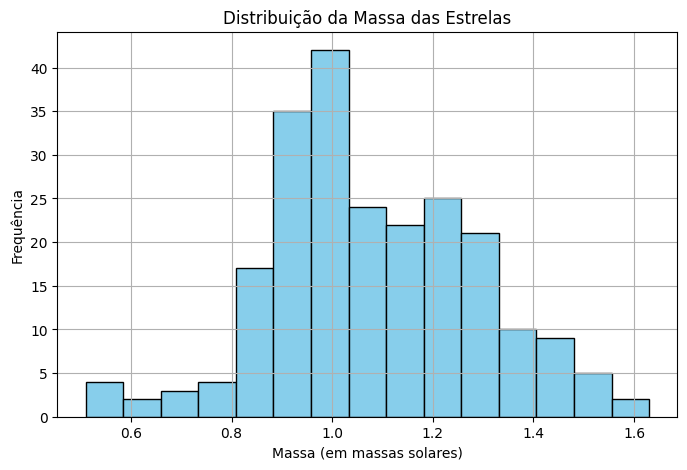

Média da massa das estrelas em Massas Solares 1.0802666666666667


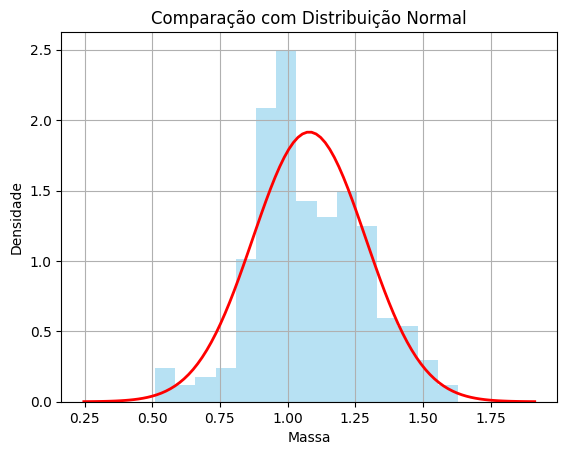

Estatística = 0.9863, p-valor = 0.0287
Distribuição não é normal (rejeita H0)


In [ ]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['st_mass'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa das Estrelas')
plt.xlabel('Massa (em massas solares)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas Solares
Mmestre = df["st_mass"].mean()
print(f"Média da massa das estrelas em Massas Solares {Mmestre}")

# plt.figure(figsize=(8, 5))
# sns.kdeplot(df['st_mass'].dropna(), fill=True, color='skyblue')
# plt.title('Distribuição KDE da Massa das Estrelas')
# plt.xlabel('Massa (em massas solares)')
# plt.grid(True)
# plt.show()

# sns.kdeplot(df['st_mass'].dropna(), fill=True, color='skyblue')

media = df['st_mass'].mean()
desvio = df['st_mass'].std()
x = np.linspace(media - 4*desvio, media + 4*desvio, 100)
y = norm.pdf(x, media, desvio)

plt.hist(df['st_mass'].dropna(), bins=15, density=True, alpha=0.6, color='skyblue')
plt.plot(x, y, 'r-', lw=2)  # Curva normal
plt.title('Comparação com Distribuição Normal')
plt.xlabel('Massa')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

stat, p = shapiro(df['st_mass'].dropna())
print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
if p > 0.05:
    print("Distribuição aparentemente normal (falha em rejeitar H0)")
else:
    print("Distribuição não é normal (rejeita H0)")



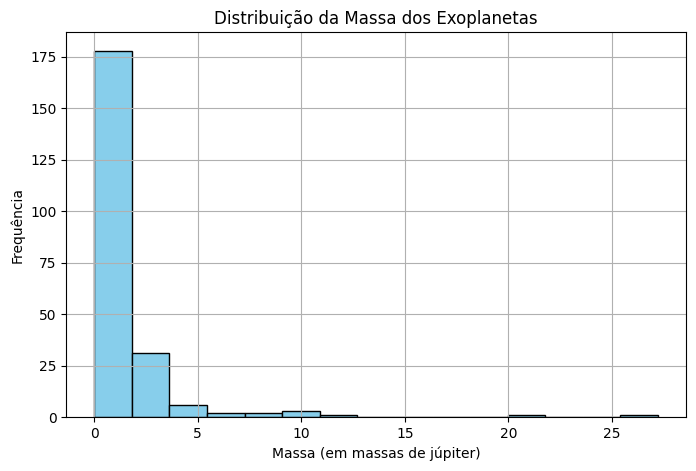

Média da massa dos planetas em Massas de Júpiter 1.5108595111111112


In [ ]:
# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_bmassj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição da Massa dos Exoplanetas')
plt.xlabel('Massa (em massas de júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Média da massa das estrelas em Massas de Júpiter
Mplaneta = df['pl_bmassj'].mean()
print(f"Média da massa dos planetas em Massas de Júpiter {Mplaneta}")

# sns.kdeplot(df['pl_bmassj'].dropna(), fill=True, color='skyblue')

# stat, p = shapiro(df['st_mass'].dropna())
# print(f'Estatística = {stat:.4f}, p-valor = {p:.4f}')
# if p > 0.05:
#     print("Distribuição aparentemente normal (falha em rejeitar H0)")
# else:
#     print("Distribuição não é normal (rejeita H0)")

A fórmula do semieixo maior da órbita é dada por:
$$
a^3 = \frac{G \cdot (M_{mestre} + M_{planeta} \cdot P^2)}{4\pi^2}
$$
Onde
- $G$ = Constante gravitacional = $6.67384 \times 10^{-11} \textrm{m}^{3}\textrm{kg}^{-1}\textrm{s}^{-2}$ <br>
- $M_{mestre}$ = Massa do planeta maior <br>
- $M_{planeta}$ = Massa do planeta menor <br>
- $P$ = Período orbital em segundos

In [ ]:
# Semieixo maior da [orbita]
G = 6.67384e-11
P = df['pl_orbper'].mean() * 86400
Mmestre_kg = Mmestre * 1.989e+30
Mplaneta_kg = Mplaneta * 1.898e+27
a_cubo = G * (Mmestre_kg + Mplaneta_kg) * P**2 / (4 * math.pi**2)
a = math.cbrt(a_cubo)
a_au = a / AU_m

# Valor do Semieixo maior com base nas médias
print(f'Semieixo Maior: {a:.3e} m\nSemieixo Maior: {a_au:.3f} UA')

Semieixo Maior: 1.642e+10 m
Semieixo Maior: 0.110 UA


Note que, em média, os exoplanetas encontrados orbitam sua estrela a cerca de 0,11 unidades astronômicas, uma órbita <br> bem mais próxima que a da Terra (1 UA), o que é comum para exoplanetas do tipo "hot Jupiter" (Júpiteres quentes) ou exoplanetas <br> com períodos curtos.

### Velocidade Orbital
Velocidade orbital é a velocidade mínima que um objeto (satélite, nave espacial, asteroide etc.) precisa ter para entrar <br> em órbita estável (circulatória) ao redor de um corpo celeste (planeta, lua, estrela), sem cair de volta nem fugir para o espaço.

- Para a Terra, essa velocidade na superfície (desprezando atmosfera) é cerca de 7,9 km/s.
- Se o objeto for lançado mais alto, em altitude h, a velocidade orbital diminui um pouco: quanto maior a distância do centro <br> da Terra, menor a velocidade necessária.

- Órbitas elípticas
    - Para órbitas elípticas, a velocidade varia ao longo da trajetória: é maior no perigeu (ponto mais próximo) e menor no <br> apogeu (ponto mais distante), obedecendo à conservação de energia (energia cinética + potencial).

- Importância prática
    - Definir satélites de comunicação, estações espaciais e sondas interplanetárias.
    - Determinar janelas de lançamento e manobras de correção de órbita.

A fórmula que nos dá velocidade média ao longo de uma volta completa é:
$$
V_{media} = \frac{2 \cdot \pi \cdot a}{P}
$$
Onde
- $a$ é o semieixo maior da elipse (para órbita circular, a = r)
- $P$ é o período orbital.

Velocidade Orbital: 93526.548 m/s
Velocidade Orbital: 93.527 km/s
Velocidade Orbital: 336695.572 km/h


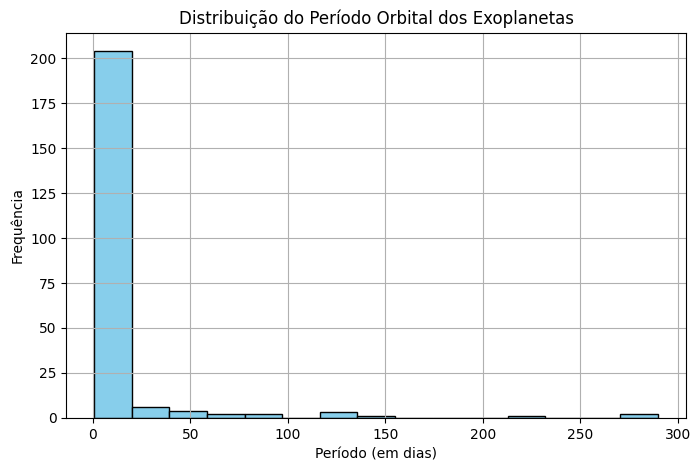

In [ ]:
# v = √(GM/r)
# • É a velocidade instantânea necessária para uma órbita perfeitamente circular de raio r.
# • Depende só da posição (r) e da massa central (M).
V_med = 2 * math.pi * a / P
print(f'Velocidade Orbital: {V_med:.3f} m/s\nVelocidade Orbital: {V_med/1000:.3f} km/s\nVelocidade Orbital: {V_med * 3.6:.3f} km/h')

# Histograma
plt.figure(figsize=(8, 5))
plt.hist(df['pl_orbper'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Período Orbital dos Exoplanetas')
plt.xlabel('Período (em dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Note que a velocidade média da orbita desses exoplanetas é de ~93 km/s, uma velocidade típica para exoplanetas muito próximos <br> de suas estrelas (comparável, por exemplo, com Mercúrio, que viaja a ~47 km/s).

### Raio de Hill (Região de Domínio Gravitacional do Planeta)

O raio de Hill (ou esfera de Hill) de um corpo "pequeno" (por exemplo, um planeta) é a região ao redor desse corpo dentro da qual <br> sua atração gravitacional domina sobre a de um corpo "grande" em torno do qual ele orbita (por exemplo, uma estrela). Num sentido <br> prático, dentro do raio de Hill um satélite natural (como a lua) pode manter-se ligado ao planeta sem ser "arrancado" pela gravidade da estrela.

- Interpretação
    - Se você colocar um satélite em órbita do planeta a uma distância menor que o raio de Hill, ele tende a permanecer ligado ao planeta.
    - Além do raio de Hill, a força gravitacional da estrela vence a do planeta e o satélite pode escapar para a estrela.

- Exemplos de aplicação
    - Estimar o limite máximo para a existência de luas estáveis.
    - Em dinâmica de sistemas de vários planetas, determinar regiões de influência mútua.
    - Em estudos de captura de objetos (asteroides, cometas) por planetas.

In [ ]:
# Raio de Hill
r_H = a * math.cbrt(Mplaneta_kg / (3*Mmestre_kg))
print(f'Raio de Hill: {r_H:.3e} m\nRaio de Hill: {r_H/1000:.3e} km\nRaio de Hill: {r_H/AU_m:.5f} UA')

Raio de Hill: 1.253e+09 m
Raio de Hill: 1.253e+06 km
Raio de Hill: 0.00838 UA


Isso nos mostra que, em média, esses exoplanetas possuem uma região de domínio gravitacional de cerca de $1.253 \cdot 10^6$ km. Comparando com <br> o da Terra (cerca de 0.01 UA), temos que:

In [ ]:
print(f'Raio de Hill do Exoplaneta (média) / Raio de Hill da Terra: {(r_H/AU_m) / 0.01:.4f} UA')

Raio de Hill do Exoplaneta (média) / Raio de Hill da Terra: 0.8377 UA


Ou seja, é 0.84 vezes mais estreito que o da Terra (84% do tamanho), cerca de 16\% mais estreito.

### Probabilidade de Trânsito

A probabilidade de trânsito refere-se à chance de um planeta, em órbita ao redor de sua estrela, passar exatamente na linha de visão entre a estrela e <br> um observador (por exemplo, a Terra). Quando isso ocorre, vemos um "trânsito": um pequeno escurecimento periódico no brilho da estrela, causado <br> pela passagem do disco do planeta na frente do disco estelar.

- Por que nem todo planeta "transita"?
    - Orientação aleatória de planos orbitais → a maioria das órbitas não está perfeitamente alinhada com nossa linha de visão.
    - Só se a inclinação orbital for próxima de 90° (a órbita “de lado”), o planeta vai cruzar o disco estelar visto da Terra.

- Interpretação do resultado
    - Se R★/a = 0,1 → Pₜ ≃ 10 % → há 1 chance em 10 de o planeta transitar.
    - Quanto mais próxima a órbita (menor a), maior a probabilidade. Planetas “quentes” (a pequeno) transitam com muito mais frequência que planetas em órbitas longas.

- Exemplo numérico
    - Terra: R☉≃ 0,00465 UA, a⊕ = 1 UA → Pₜ ≃ 0,00465 → 0,465% (cerca de 1 em 215 chances de a Terra, vista de um lugar aleatório, transitar o Sol)
    - Kepler-10 b (planeta bem próximo): R★/a ≃ 0,03 → Pₜ ≃ 3 %

- Aplicação prática
    - Em levantamentos de trânsito (como missões Kepler, TESS), a probabilidade de trânsito determina quantos planetas de uma dada população devemos esperar detectar.
    - Para estimar a taxa real de ocorrência de exoplanetas, corrige-se o número observado dividindo-se pela probabilidade geométrica de trânsito.

In [ ]:
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Light_curve_of_binary_star_Kepler-16.jpg", width="500">
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Jupiter-io-transit_feb_10_2009.gif"> <br>
A curva de luz mostra a mudança na luminosidade da estrela como resultado <br> do trânsito. Os dados foram coletados pela missão Kepler.<br>

Média do Raio das Estrelas (em Raio Solar): 1.222
Média do Raio dos Planetas (em Raio de Júpiter): 1.103


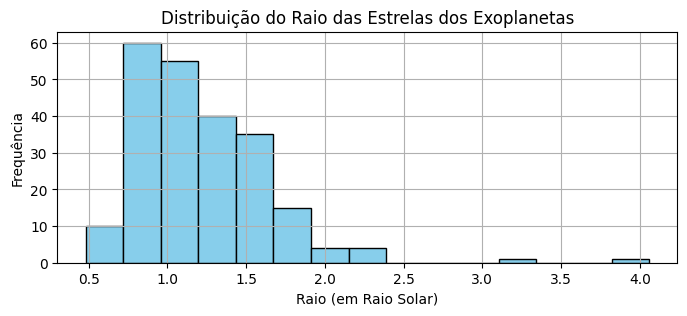

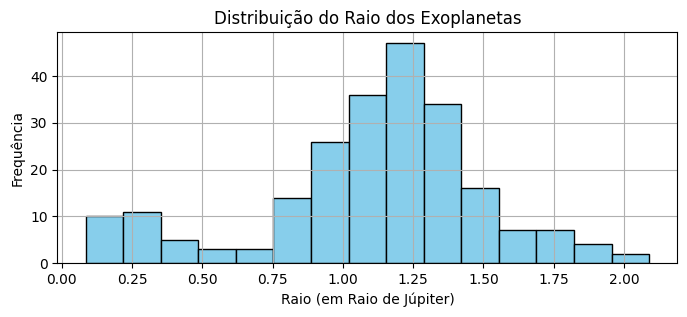

Probabilidade de Trânsito: 0.0565


In [ ]:
# Média do Raio das Estrelas
R_estrela = df['st_rad'].mean()

# Média do Raio dos Planetas
R_planeta = df['pl_radj'].mean()

print(f'Média do Raio das Estrelas (em Raio Solar): {R_estrela:.3f}')
print(f'Média do Raio dos Planetas (em Raio de Júpiter): {R_planeta:.3f}')

# Histograma (Raio das Estrelas)
plt.figure(figsize=(8, 3))
plt.hist(df['st_rad'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio das Estrelas dos Exoplanetas')
plt.xlabel('Raio (em Raio Solar)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Histograma (Raio dos Planetas)
plt.figure(figsize=(8, 3))
plt.hist(df['pl_radj'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Raio dos Exoplanetas')
plt.xlabel('Raio (em Raio de Júpiter)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# print(f'Raio da Estrela (Raio Solar): {R_estrela}\nRaio da Estrela (UA): {}')
R_estrela_au = R_estrela * AU_rs
R_planeta_au = R_planeta * AU_rj
P_transito = (R_estrela_au + R_planeta_au) / a_au
print(f'Probabilidade de Trânsito: {P_transito:.4f}')

Logo, podemos observar que, em média, esses exoplanetas possuem uma probabilidade de trânsito de $0.0565 \approxeq 6\%$ ou seja, cerca de 113 em 2000 chances desses <br> exoplanetas, visto da Terra, transitar sua estrela.

## Utilizando Estatística
Com esses dados em mãos, podemos agora utilizar a estatística para concluir algo sobre os sistemas de exoplanetas.

### Probabilidade de Trânsito
Temos que a probabilidade de trânsito entre os 225 sistemas observados é de 0.0565. Queremos então calcular o valor esperado para 1000 sistemas. Utilizaremos a <br>
fórmula: $E = np$

Onde
- $E$ é o número esperado de eventos (exoplanetas com trânsito detectável),
- $n$ é o número de estrelas observadas (ou sistemas com planetas),
- $p$ = $P_{trânsito}$ é a probabilidade de um trânsito ocorrer para um sistema aleatório com características médias.

In [ ]:
n_obs = 1000
E_transito = n_obs * P_transito
desvp_transito = math.sqrt(E_transito*(1-P_transito))

print(f'São esperados cerca de {E_transito:.2f} trânsitos.')
# print(f'Média: {E:.2f}')
print(f'Desvio padrão: {desvp_transito:.2f}')
print(f'Intervalo 1σ (68%): entre {E_transito - desvp_transito:.2f} e {E_transito + desvp_transito:.2f} detecções, aproximadamente.')

São esperados cerca de 56.54 trânsitos.
Desvio padrão: 7.30
Intervalo 1σ (68%): entre 49.24 e 63.85 detecções, aproximadamente.


Podemos também calcular a probabilidade de observar exatamente 112 trânsitos nesses 1000 sistemas utilizando distribuição binomial:
$$
P(k; n, p) = \binom{n}{k} \cdot p^k \cdot q^{n-k}
$$

In [ ]:
k = 112

prob = binom.pmf(k, n_obs, P_transito)
print(f"P(X = 112): {prob:.3e}")

print(f'Note que: Z = {(k - E_transito)/desvp_transito:.2f}')

P(X = 112): 5.232e-12
Note que: Z = 7.59


De acordo com o valor de $Z$ temos que 112 é mais de 7 desvios padrão acima da média, o que é extremamente improvável, como pode ser percebido em $P(X = 112)$. Ou <br> seja, a chance de observar exatamente 112 trânsitos entre 1000 estrelas com $p \approxeq 0.0565$ é praticamente zero, um evento altamente improvável. Um valor de $5.232 \cdot 10^{-12}$ <br> significa que se você repetir esse experimento 1 trilhão de vezes, esperaria ver esse resultado apenas 5 vezes.

- Na prática, pode indicar que:
    - Houve algum viés (por exemplo, erro de medição),
    - Ou o valor de $p$ usado no modelo não representa bem o verdadeiro sistema,
    - Ou é realmente um caso excepcional e raro.

### Semieixo Maior
Queremos calcular o IC (intervalo de confiança) de 95% para o Semieixo Maior, utilizando:
$$
IC = \overline{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$
Onde
- $\overline{x}$ é a média (0.11 UA)
- $s$ é o desvio padrão amostral
- $n$ = 225
- $z$ para 95% $\approx$ 1.96

Calculando variância e desvio padrão:

In [ ]:
# Variância do Semieixo Maior
variancia_a = sum((x - a_au)**2 for x in df['pl_orbsmax']) / len(df['pl_orbsmax'])

# Desvio Padrão do Semieixo Maior
desvp_a = math.sqrt(variancia_a)

print(f'Variância: {variancia_a:.4f}\nDesvio padrão: {desvp_a:.4f}')

Variância: 0.0165
Desvio padrão: 0.1286


Aplicando na fórmula:

In [ ]:
# Parâmetros
z = 1.96
n = len(df['pl_orbsmax'])

# Cálculo do IC
IC_apos = a_au + z * desvp_a/math.sqrt(n)
IC_aneg = a_au - z * desvp_a/math.sqrt(n)
print(f'IC = [{IC_aneg:.4f}; {IC_apos:.4f}]')

IC = [0.0929; 0.1265]


Com uma amostra de 225 planetas, o semieixo maior médio foi de 0,11 UA. Com um desvio padrão de 0,1286 UA, o intervalo de confiança <br> de 95% para a média populacional do semieixo maior está entre 0,0929 e 0,1265 UA. Isso sugere que a maioria dos exoplanetas analisados <br> orbita sua estrela a uma distância muito menor do que a da Terra em relação ao Sol (1 UA), reforçando o viés observacional na detecção de <br> exoplanetas com órbitas curtas.

Poderiamos fazer testes de hipóteses para a média do semieixo maior. Se quisessemos comparar com a Terra, que possui semieixo maior <br> de 1 UA, e considerar essa a "recomendação" para que haja vida nesses exoplanetas, teríamos as seguintes hipóteses:

$H_0$: o valor médio do semieixo maior é igual a 1 UA.<br>
$H_a$: o valor médio do semieixo maior é menor que 1 UA.

Como já foi mostrado, o valor médio do semieixo maior é, de fato, menor que 1 UA, então rejeitaríamos $H_0$ em favor de $H_a$. Logo, não há <br> como ter vida nesses exoplanetas. Utilizando T-Student para mostrar isso:
$$
t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}
$$
Onde
- $\overline{x}$ = 0.11 UA
- $s$ = 0.1286
- $n$ = 225
- $\mu_0$ = 1 UA (média sob $H_0$)

In [ ]:
# Dados da amostra
media_hipotetica = 1        # valor de comparação (média sob H0)

# Cálculo do t
erro_padrao = desvp_a / math.sqrt(n)
t_calculado = (a_au - media_hipotetica) / erro_padrao

# Graus de liberdade
df = n - 1

# p-valor (unilateral, H1: média < 1)
p_valor = stats.t.cdf(t_calculado, df)

# Resultado
print(f'T-valor calculado: {t_calculado:.4f}')
print(f'P-valor (unilateral): {p_valor:.4e}')

# Conclusão
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H0: A média é significativamente menor que 1 UA.")
else:
    print("Não rejeitamos H0: Não há evidência suficiente para afirmar que a média é menor que 1 UA.")

T-valor calculado: -103.8084
P-valor (unilateral): 1.0488e-191
Rejeitamos H0: A média é significativamente menor que 1 UA.


Esse valor de $t$ é muito negativo (muito distante da média sob $H_0$), o que implica um probabilidade praticamente nula de isso acontecer ao <br> acaso se $H_0$ fosse verdadeira.